## Surprise Housing Assignment

The solution is divided into the following sections:

* Data understanding and exploration<br>
* Data cleaning<br>
* Data preparation<br>
* Model building and evaluation<br>

### Importing Libraries

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import datetime

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding and Cleaning the Data

In [2]:
#reading the csv file and printing its shape
df = pd.read_csv('train.csv')
print(df.shape)

(1460, 81)


In [3]:
# quick look at the data
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#Some statistical insights
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

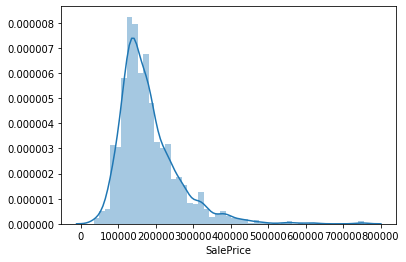

In [5]:
#visualizing the distribution of sale price
sns.distplot(df['SalePrice'])

Insights : This looks skewed towards the right with Skew of 1.8828757597682129

In [6]:
# calculating skewness
print("skew of salePrice",df['SalePrice'].skew()) 

skew of salePrice 1.8828757597682129


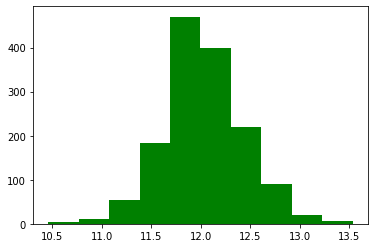

In [7]:
#lets apply log transform to make it normally distributed
df['LT_Saleprice']=np.log(df['SalePrice']+1)
plt.hist(df['LT_Saleprice'],color='green')
plt.show()

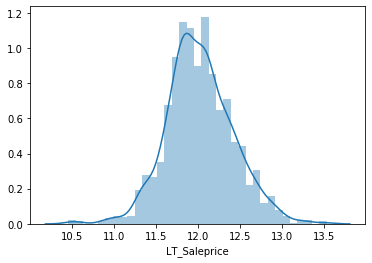

In [8]:
# #visualizing the distribution of sale price after transformation
sns.distplot(df['LT_Saleprice'])

Insights : This looks almost normal distribution with Skew of 0.1213466198968533

In [9]:
# calculating skewness
print("skew of salePrice",df['LT_Saleprice'].skew())

skew of salePrice 0.12134661989685333


In [10]:
# dropping old column
df.drop('SalePrice', axis= 1, inplace=True)

In [11]:
# dropping the ID column
df.drop('Id', axis = 1, inplace = True)
print(df.shape)

(1460, 80)


In [12]:
#percentage of null values in different columns
df_null=round(df.isnull().sum()/len(df.index),2)*100 
print(df_null[df_null!=0])

LotFrontage      18.0
Alley            94.0
MasVnrType        1.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
FireplaceQu      47.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
PoolQC          100.0
Fence            81.0
MiscFeature      96.0
dtype: float64


In [13]:
#'Alley', 'PoolQC', 'Fence', and 'MiscFeature' columns are with very high number of nan values.dropping the columns
df_dropped = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
print('Shape of the orginal df:', df.shape)
print('Shape after dropping:', df_dropped.shape)

Shape of the orginal df: (1460, 80)
Shape after dropping: (1460, 76)


In [14]:
#identify numerical and categorical columns 
catcols = []
NumCols = []

for col in df_dropped:
    if df_dropped[col].dtypes == 'object':
        catcols.append(col)  
    else:
        NumCols.append(col)
print('Categorical columns:\n',catcols)

print('Numerical columns:\n',NumCols)

Categorical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclose

In [15]:
#Checking how many unique values are there in each of the categorical column
value_counts = []
for col in catcols:
    value_counts.append(len(df_dropped[col].value_counts()))
data_val = {'cat_col': catcols, 'value_counts': value_counts}
pd.DataFrame(data_val)

cat_col  value_counts
0        MSZoning             5
1          Street             2
2        LotShape             4
3     LandContour             4
4       Utilities             2
5       LotConfig             5
6       LandSlope             3
7    Neighborhood            25
8      Condition1             9
9      Condition2             8
10       BldgType             5
11     HouseStyle             8
12      RoofStyle             6
13       RoofMatl             8
14    Exterior1st            15
15    Exterior2nd            16
16     MasVnrType             4
17      ExterQual             4
18      ExterCond             5
19     Foundation             6
20       BsmtQual             4
21       BsmtCond             4
22   BsmtExposure             4
23   BsmtFinType1             6
24   BsmtFinType2             6
25        Heating             6
26      HeatingQC             5
27     CentralAir             2
28     Electrical             5
29    KitchenQual             4
30     Functional             7
31    FireplaceQu             5
32     GarageType             6
33   GarageFinish             3
34     GarageQual             5
35     GarageCond             5
36     PavedDrive             3
37       SaleType             9
38  SaleCondition             6

In [16]:
#'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are nan because there is No Garage'. So replacing NANs with it.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_dropped[col].fillna('No Garage', inplace=True)
df_dropped['GarageYrBlt'].fillna(0, inplace=True)

In [17]:
#'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' are NAN when there is 'No Basement'. So replacing NANs with it
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df_dropped[col].fillna('No Basement', inplace=True)

In [18]:
#rechecking percentage of null values in differend columns
df_null=round(df_dropped.isnull().sum()/len(df_dropped.index),2)*100 
print(df_null[df_null!=0])

LotFrontage    18.0
MasVnrType      1.0
MasVnrArea      1.0
FireplaceQu    47.0
dtype: float64


In [19]:
#Unique values in 'FireplaceQu'
df_dropped['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [20]:
#Filling the NANs in 'FireplaceQu' with the most frequent value 'No Fireplace'
df_dropped['FireplaceQu'].fillna('No Fireplace', inplace=True)

### EDA

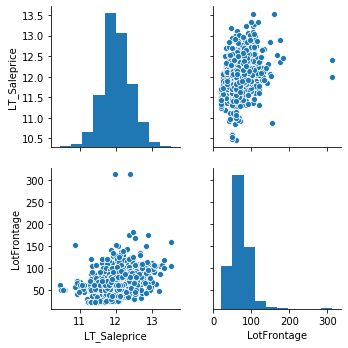

In [21]:
#Let's see how important the 'LotFrontage' column is
sns.pairplot(df_dropped[['LT_Saleprice','LotFrontage']])

In [22]:
#Looks like 'LotFrontage' is an important column. Replace missing values of LotFrontage with Median
df_dropped.loc[:,'LotFrontage'] = df_dropped.loc[:, 'LotFrontage'].fillna(df_dropped['LotFrontage'].median())

In [23]:
df_dropped.dropna(inplace = True)

In [24]:
df_dropped.isnull().sum() #there is no null value anymore

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
LT_Saleprice     0
Length: 76, dtype: int64

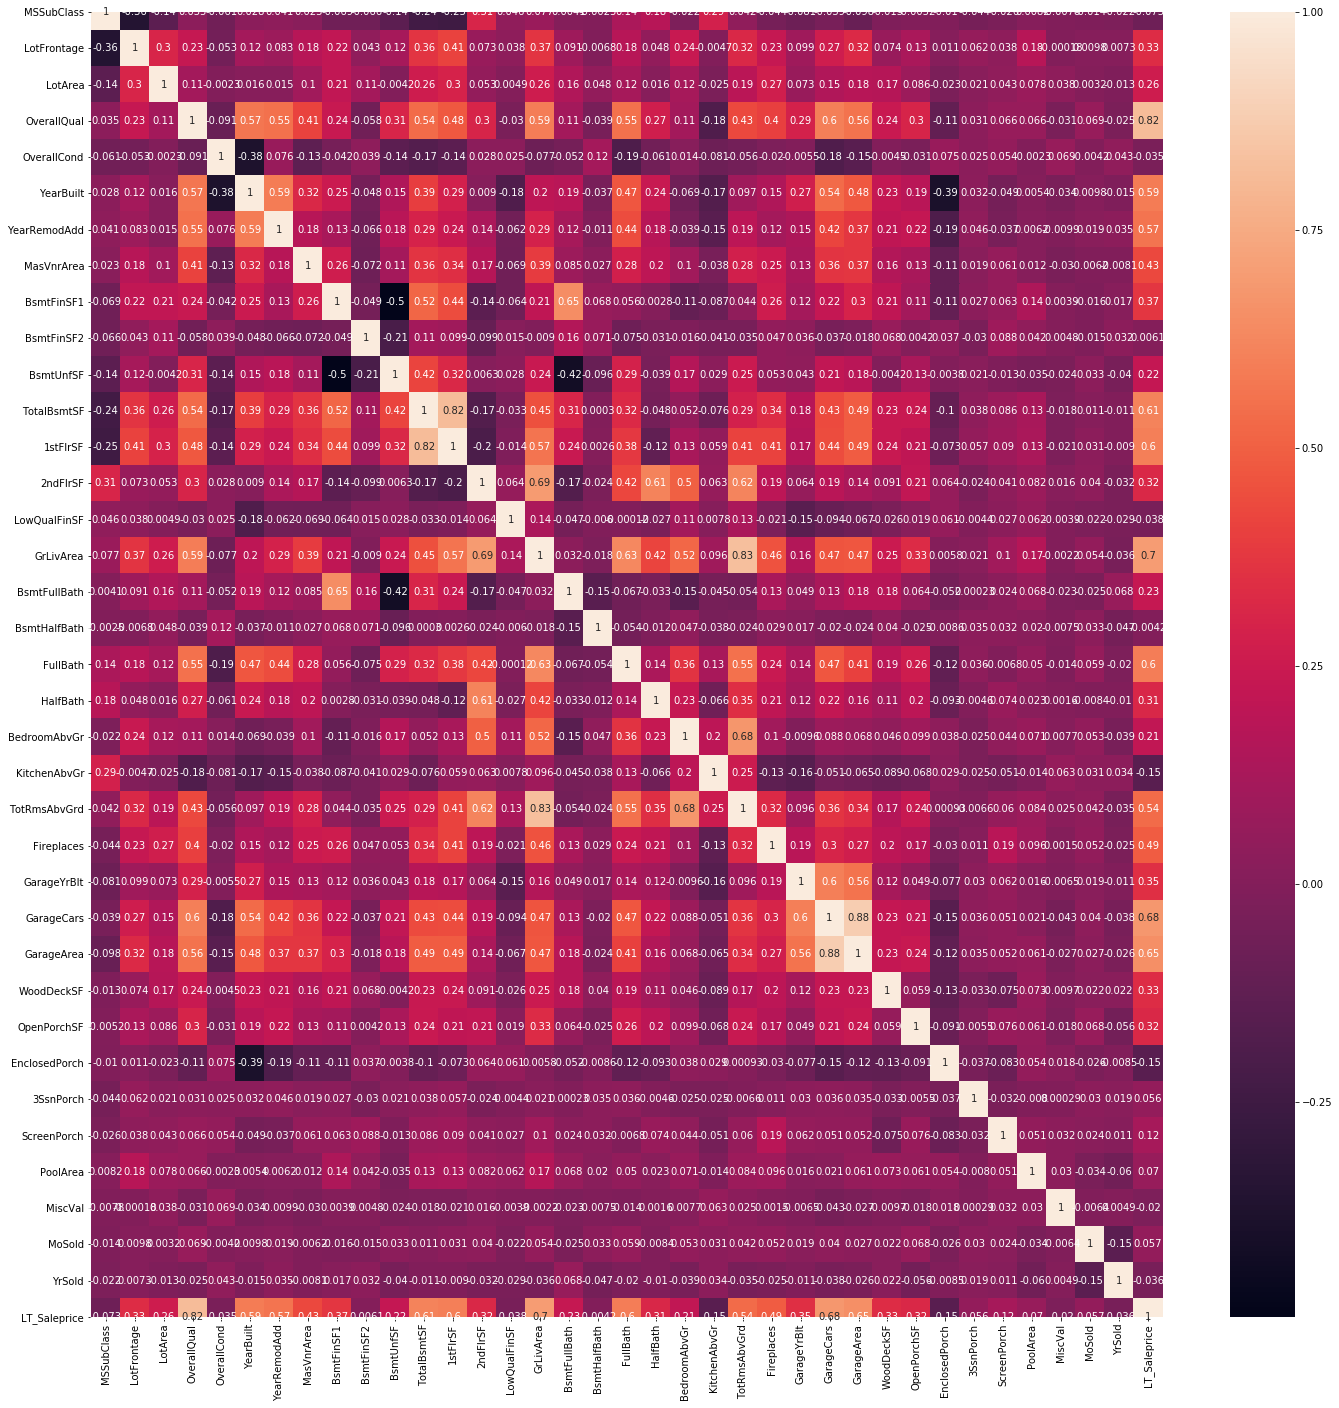

In [25]:
plt.figure(figsize=(24, 24))
sns.heatmap(df_dropped.corr(), annot = True)

- insights : GarageCars and Garage area ,GrLivArea and TotRmsAbvGrd ,TotalBsmtSF and 1stFlrSF are highly correlated

In [26]:
# So, let's drop GarageCars column since it is highly correlated with Garage area
df_dropped.drop('GarageCars', axis=1, inplace = True)
df_dropped.shape

(1451, 75)

<Figure size 2880x2880 with 0 Axes>

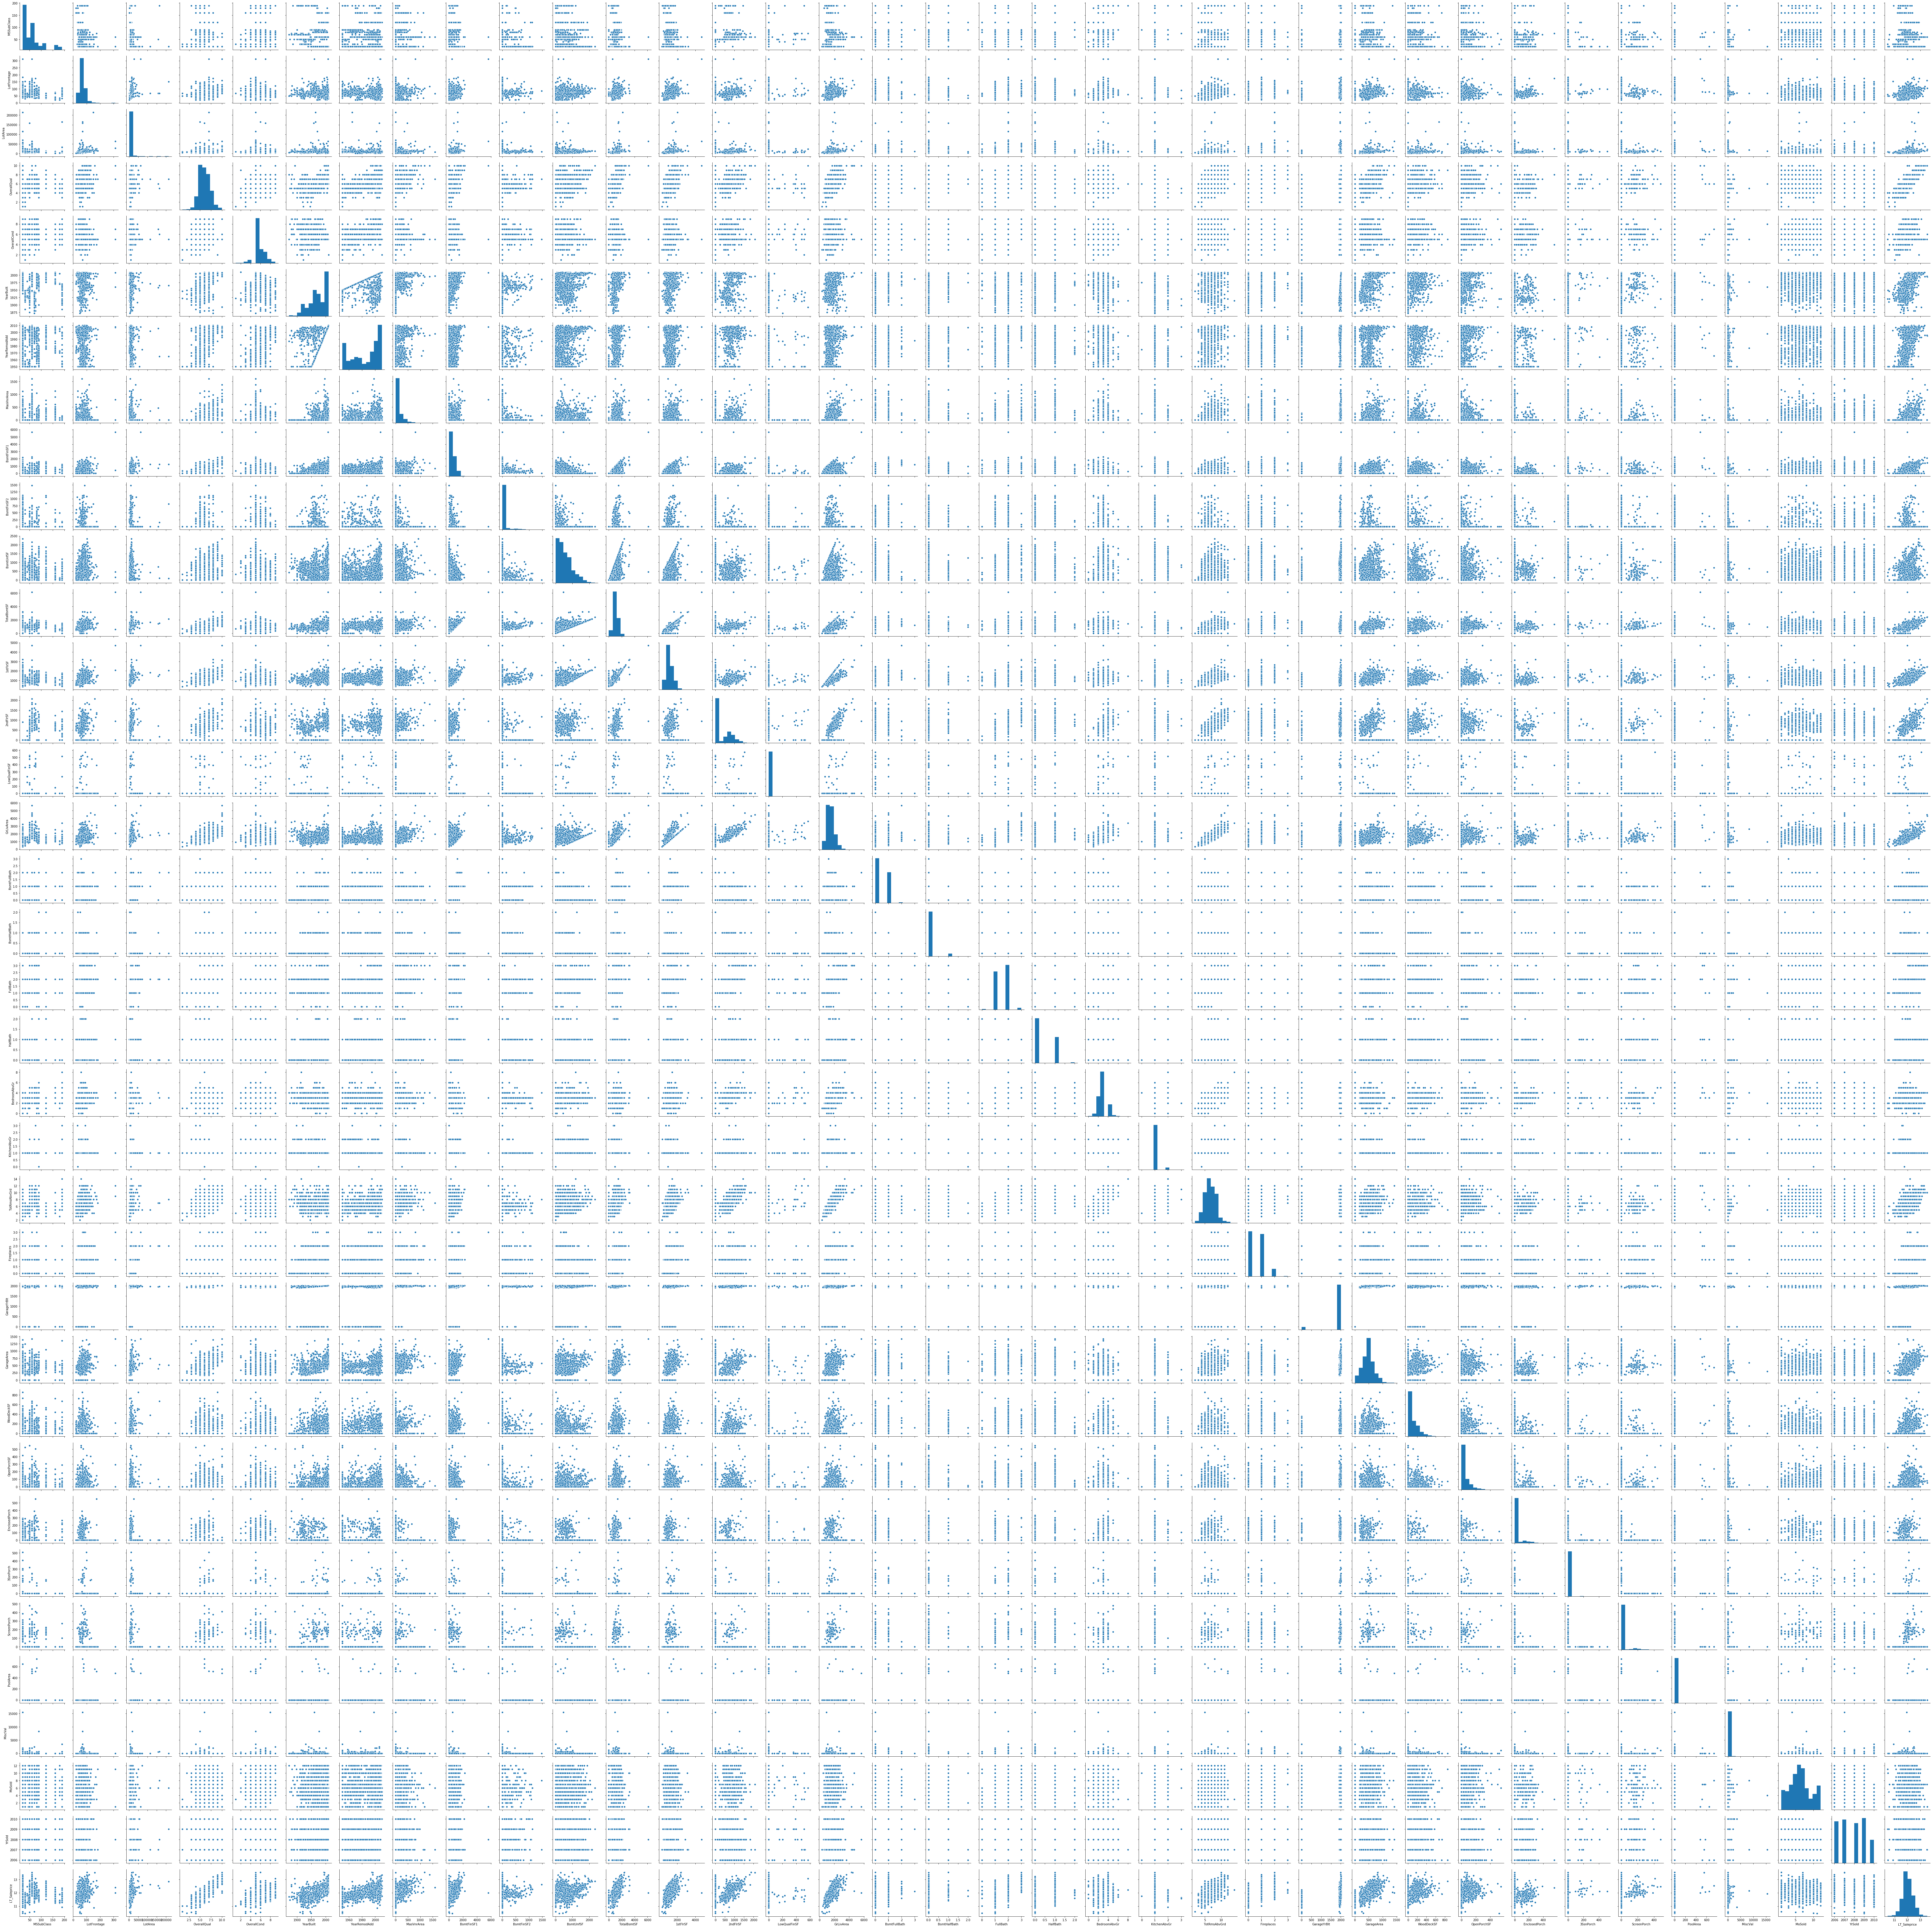

In [27]:
#Selecting only numeric variables
df_numeric = df_dropped.select_dtypes(include=['float64', 'int64'])

# Pairwise scatter plot
plt.figure(figsize=(40, 40))
sns.pairplot(df_numeric)
plt.show()

Text(0, 0.5, 'Count')

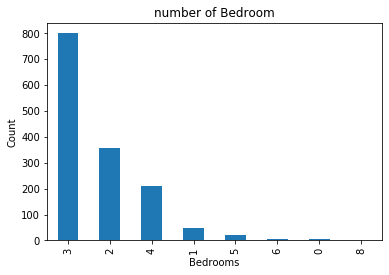

In [28]:
# number of bedrooms
df_dropped['BedroomAbvGr'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

- As we can see most count prefer 3 bedrooms

Text(0, 0.5, 'Area')

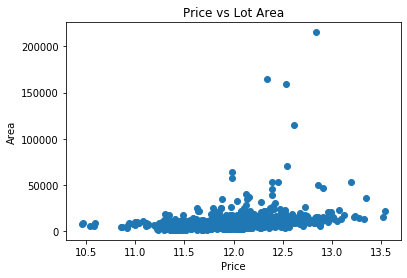

In [29]:
# Price verses LotArea
plt.scatter(df_dropped.LT_Saleprice,df_dropped.LotArea)
plt.title("Price vs Lot Area")
plt.xlabel('Price')
plt.ylabel('Area')

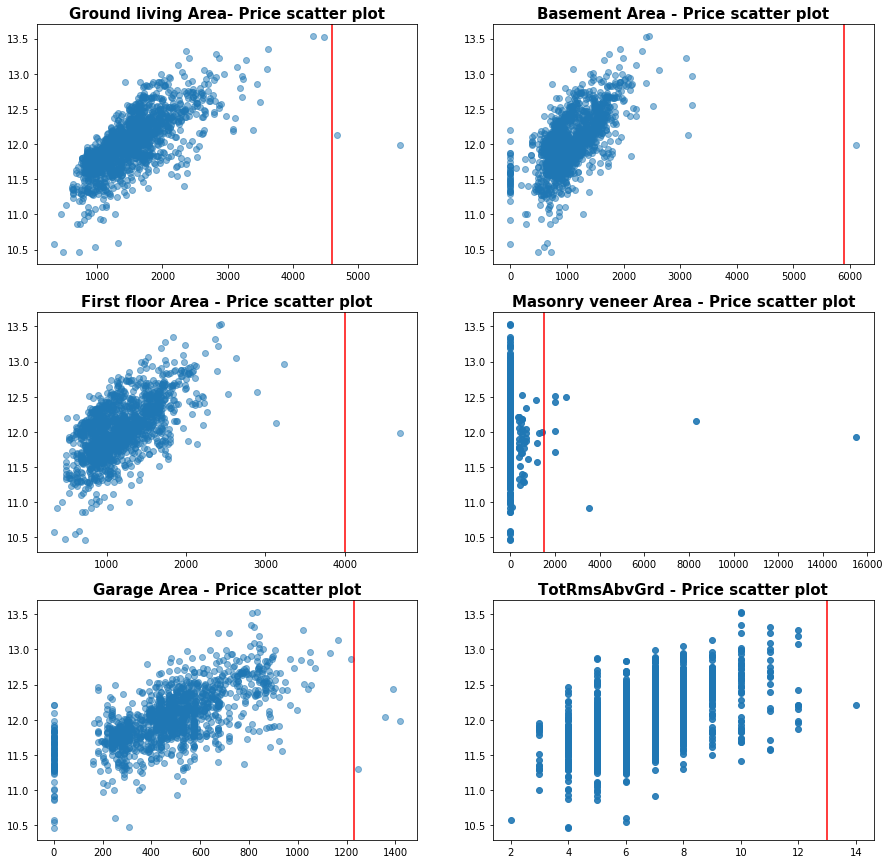

In [30]:
#setting figsize
fig = plt.figure(figsize=(15,15))
#creating subplots
ax1 = plt.subplot2grid((3,2),(0,0))
#scatter plot
plt.scatter(x=df_dropped['GrLivArea'], y=df_dropped['LT_Saleprice'], alpha=0.5)
#line
plt.axvline(x=4600, color='r', linestyle='-')
#title
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=df_dropped['TotalBsmtSF'], y=df_dropped['LT_Saleprice'],alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=df_dropped['1stFlrSF'], y=df_dropped['LT_Saleprice'],alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=df_dropped['MiscVal'], y=df_dropped['LT_Saleprice'],alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=df_dropped['GarageArea'], y=df_dropped['LT_Saleprice'],alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=df_dropped['TotRmsAbvGrd'], y=df_dropped['LT_Saleprice'],alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

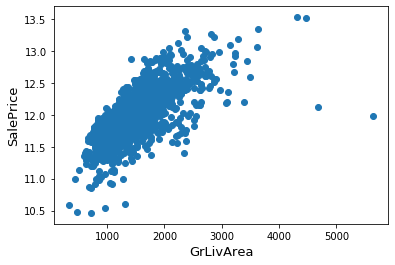

In [31]:
#Deleting outliers for sale price columns
train = df.drop(df[(df['GrLivArea']>4000) & (df['LT_Saleprice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['LT_Saleprice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

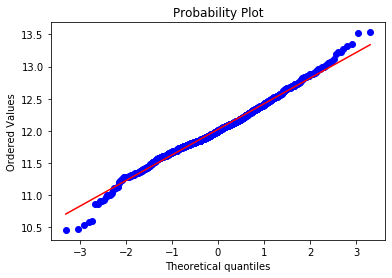

In [32]:
# QQ-plot for Saleprice
fig = plt.figure()
res = stats.probplot(df['LT_Saleprice'], plot=plt)
plt.show()

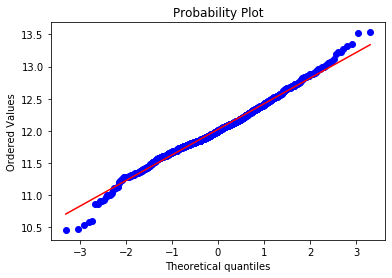

In [33]:
# Probability plot of sale price
res = stats.probplot(df['LT_Saleprice'], plot=plt)
plt.show()

### Derived feature

In [34]:
#Getting the age of the houses
df_dropped['CurrentYear'] = datetime.datetime.now().year
df_dropped["Age"] = df_dropped['CurrentYear'] - df_dropped['YearBuilt']
df_dropped.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

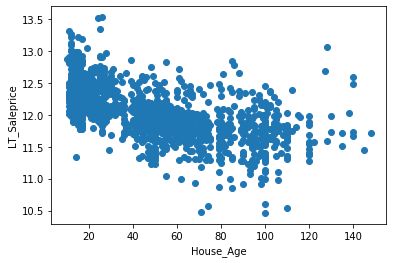

In [35]:
# Plotting house age verses sales price
plt.scatter(x=df_dropped['Age'], y=df_dropped['LT_Saleprice'])
plt.xlabel("House_Age"); plt.ylabel("LT_Saleprice");

### Getting Dummies

In [36]:
#regenerating list of numerical and non-numerical columns
NonNumCols = []
NumCols = []

for col in df_dropped:
    if df_dropped[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Sc

In [37]:
#Its time to get dummies for all other categorical variables
df_dummy = pd.get_dummies(df_dropped[NonNumCols], drop_first=True)

In [38]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([df_dropped, df_dummy], axis=1)
df_concat.shape

(1451, 285)

In [39]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(NonNumCols, axis = 1)
df_final.shape

(1451, 246)

### Train-Test Split

In [40]:
X = df_final.drop('LT_Saleprice', axis=1)
y = df_final['LT_Saleprice']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1015, 245)
X_test Shape: (436, 245)
y_train Shape: (1015,)
y_test Shape: (436,)


In [42]:
X_train.head(3)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
801           30         40.0     4800            4            7   
569           90         69.0     7032            5            5   
1181         120         64.0     5587            8            5   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
801           1990         0.0         197           0        999  ...   
569           1979         0.0         943           0          0  ...   
1181          2008       186.0        1480           0        120  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
801                0               0             0             0            1   
569                0               0             0             0            1   
1181               0               0             1             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
801                       0                     0                     0   
569                       0                     0                     0   
1181                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
801                      1                      0  
569                      1                      0  
1181                     0                      1  

[3 rows x 245 columns]

In [43]:
y_train.head(3)

801     11.607335
569     11.820123
1181    12.880294
Name: LT_Saleprice, dtype: float64

### Scaling

In [44]:
scaler = StandardScaler()

In [45]:
#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('LT_Saleprice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
801    -0.650652    -1.298599 -0.513865    -1.552452     1.293141   
569     0.788676    -0.041883 -0.315476    -0.824292    -0.538734   
1181    1.508340    -0.258558 -0.443913     1.360189    -0.538734   
808     0.548788     0.651477  0.250537    -0.824292    -0.538734   
1095   -0.890540     0.348132 -0.112376    -0.096131    -0.538734   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
801       0.238209   -0.562965   -0.502945   -0.297804   0.936307  ...   
569      -0.301373   -0.562965    1.097605   -0.297804  -1.320626  ...   
1181      1.121161    0.447197    2.249743   -0.297804  -1.049523  ...   
808      -0.939061    5.123271    0.181472    0.484095  -0.462133  ...   
1095      1.023055   -0.562965   -0.874119   -0.297804   1.593732  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
801                0               0             0             0            1   
569                0               0             0             0            1   
1181               0               0             1             0            0   
808                0               0             0             0            1   
1095               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
801                       0                     0                     0   
569                       0                     0                     0   
1181                      0                     0                     0   
808                       0                     0                     0   
1095                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
801                      1                      0  
569                      1                      0  
1181                     0                      1  
808                      1                      0  
1095                     1                      0  

[5 rows x 245 columns]

In [46]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
357    1.508340    -1.125258 -0.565062    -0.824292    -0.538734   
824   -0.890540     0.478137  0.056414     1.360189    -0.538734   
369   -0.890540    -0.041883 -0.066779    -0.824292     1.293141   
291    3.187555    -0.648573 -0.435025    -0.824292     0.377204   
134   -0.890540     0.348132 -0.021893    -0.824292     0.377204   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
357     -0.448532   -0.562965    0.949564   -0.297804  -0.715162  ...   
824      1.023055   -0.562965   -0.925611   -0.297804   2.043312  ...   
369      1.023055   -0.562965   -0.771134    1.278212   0.335362  ...   
291      0.728738   -0.562965   -0.475054   -0.297804  -0.032886  ...   
134      0.385367   -0.562965    0.297330   -0.297804   0.692315  ...   

     SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
357               0               0             0             0            1   
824               0               0             1             0            0   
369               0               0             0             0            1   
291               0               0             0             0            1   
134               0               0             0             0            1   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
357                      0                     0                     0   
824                      0                     0                     0   
369                      0                     0                     0   
291                      0                     0                     0   
134                      0                     0                     0   

     SaleCondition_Normal  SaleCondition_Partial  
357                     1                      0  
824                     0                      1  
369                     1                      0  
291                     1                      0  
134                     1                      0  

[5 rows x 245 columns]

### Model Building and Evaluation

### Ridge Regression

In [47]:
# list of alphas to tune
params = {'alpha': [0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004994      0.001105         0.000990    1.425863e-05       1e-06   
1       0.004987      0.000630         0.001196    3.985882e-04       1e-05   
2       0.004588      0.000489         0.000997    6.143617e-07      0.0001   
3       0.004588      0.000488         0.000997    1.784161e-07       0.001   
4       0.004588      0.000489         0.000997    1.507891e-07        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.113152          -0.087732          -0.111020   
1   {'alpha': 1e-05}          -0.113151          -0.087732          -0.111016   
2  {'alpha': 0.0001}          -0.113149          -0.087732          -0.110984   
3   {'alpha': 0.001}          -0.113120          -0.087749          -0.110662   
4    {'alpha': 0.01}          -0.112882          -0.088690          -0.107918   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.101108  ...        -0.100611        0.010425               28   
1          -0.101105  ...        -0.100609        0.010425               27   
2          -0.101073  ...        -0.100590        0.010422               26   
3          -0.100764  ...        -0.100413        0.010394               25   
4          -0.099211  ...        -0.099427        0.009893               24   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.056131           -0.059967           -0.056006   
1           -0.056132           -0.059967           -0.056006   
2           -0.056132           -0.059967           -0.056006   
3           -0.056141           -0.059978           -0.056011   
4           -0.056220           -0.060333           -0.056292   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.058748           -0.058014         -0.057773         0.001526  
1           -0.058748           -0.058014         -0.057773         0.001526  
2           -0.058749           -0.058019         -0.057775         0.001526  
3           -0.058759           -0.058065         -0.057791         0.001529  
4           -0.059077           -0.058798         -0.058144         0.001626  

[5 rows x 21 columns]

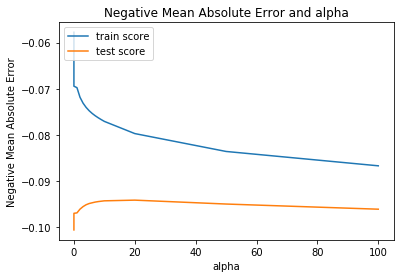

In [49]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [50]:
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01626195, -0.00994244,  0.01966863,  0.08553054,  0.04290564,
        0.01472258, -0.00148181, -0.0096617 ,  0.00231003,  0.0018146 ,
       -0.00745871,  0.03996019,  0.04011533,  0.0046733 ,  0.0623822 ,
        0.03079126,  0.000644  ,  0.01753221,  0.01556121,  0.01480551,
       -0.00906185,  0.02007579,  0.00898095,  0.01332973,  0.03152607,
        0.01473365, -0.00190118,  0.0126312 ,  0.00816569,  0.01638301,
       -0.00951183, -0.00492531,  0.00015713, -0.00637166, -0.03013818,
        0.06424564,  0.05891568,  0.07123768,  0.02756266,  0.03558941,
        0.02949508, -0.05790944, -0.00206435,  0.05797669,  0.03459139,
        0.04752125, -0.014275  ,  0.03127114, -0.02427276, -0.01905355,
       -0.01998213,  0.02310664, -0.01827244, -0.01450796, -0.02506464,
        0.04267474,  0.01851099, -0.00819393,  0.08931352, -0.06387525,
       -0.01656472, -0.08432219, -0.07975812, -0.02443097, -0.00991787,
       -0.00268191, -0.01908228,  0.05120973,  0.09479801, -0.03

### Lasso Regression

In [51]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.137788      0.008744         0.000998    4.264961e-07       1e-06   
1       0.140959      0.010805         0.001198    3.987084e-04       1e-05   
2       0.086767      0.028684         0.001396    4.884805e-04      0.0001   
3       0.030718      0.004942         0.001995    6.302987e-04       0.001   
4       0.011570      0.000488         0.001795    4.002098e-04        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.112832          -0.079368          -0.110393   
1   {'alpha': 1e-05}          -0.111722          -0.079115          -0.108786   
2  {'alpha': 0.0001}          -0.106299          -0.081875          -0.097710   
3   {'alpha': 0.001}          -0.105876          -0.093752          -0.088199   
4    {'alpha': 0.01}          -0.115106          -0.105531          -0.101470   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.100352  ...        -0.098434        0.012668                4   
1          -0.097374  ...        -0.096875        0.012395                3   
2          -0.087201  ...        -0.091089        0.009501                1   
3          -0.090047  ...        -0.094192        0.006181                2   
4          -0.104353  ...        -0.106693        0.004582                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.056212           -0.059998           -0.056043   
1           -0.056588           -0.060328           -0.056278   
2           -0.059771           -0.065709           -0.060402   
3           -0.071407           -0.083272           -0.083776   
4           -0.089211           -0.106113           -0.104158   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.058802           -0.058057         -0.057822         0.001517  
1           -0.059085           -0.058452         -0.058146         0.001527  
2           -0.064045           -0.063845         -0.062754         0.002281  
3           -0.083190           -0.084541         -0.081237         0.004938  
4           -0.103654           -0.103145         -0.101256         0.006106  

[5 rows x 21 columns]

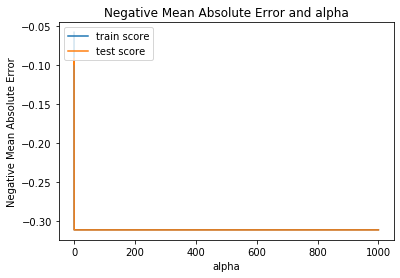

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [54]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
lasso.coef_

array([-1.95167847e-02, -7.93386046e-03,  1.75484325e-02,  9.76652335e-02,
        4.67120125e-02,  1.68761145e-02,  0.00000000e+00, -0.00000000e+00,
        2.12936146e-04,  6.96915044e-03,  0.00000000e+00,  1.40528997e-03,
        0.00000000e+00, -4.02202932e-05,  1.03222027e-01,  3.36806006e-02,
        1.56834113e-03,  1.76234749e-02,  1.36214407e-02,  1.22232263e-02,
       -3.58259126e-03,  2.25425653e-02,  1.19762216e-02,  1.29803370e-02,
        3.26596027e-02,  1.53601456e-02, -0.00000000e+00,  1.08496880e-02,
        6.66706896e-03,  1.69993614e-02, -1.12324875e-02, -3.76572835e-03,
        0.00000000e+00, -7.08891353e-03, -4.75038338e-02,  2.55212017e-02,
        0.00000000e+00,  5.34658195e-02, -0.00000000e+00,  0.00000000e+00,
        6.40967838e-03, -1.48176643e-02, -1.23579955e-04,  1.69797445e-02,
        0.00000000e+00,  8.24669074e-03, -0.00000000e+00,  3.29402805e-02,
       -0.00000000e+00, -0.00000000e+00, -1.18091597e-02,  0.00000000e+00,
       -0.00000000e+00, -

In [56]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

Error distribution in train dataset


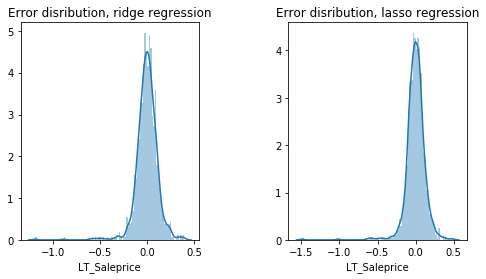

In [57]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [58]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.9169911842849316
r2_score for lasso: 0.9006263344913252


In [59]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


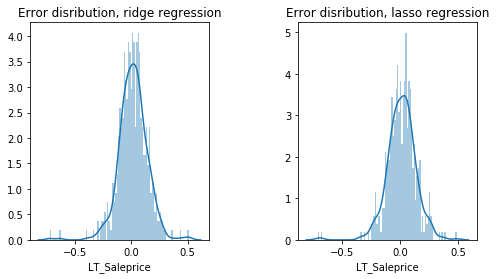

In [60]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

* From above graph it is clear that the errors are normally distributed with mean at zero

#### Rsquared for train and test data for Ridge and Lasso

In [61]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.92
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.9


In [62]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 11.772),
 ('MSSubClass', -0.02),
 ('LotFrontage', -0.008),
 ('LotArea', 0.018),
 ('OverallQual', 0.098),
 ('OverallCond', 0.047),
 ('YearRemodAdd', 0.017),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.007),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.001),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.103),
 ('BsmtFullBath', 0.034),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.018),
 ('HalfBath', 0.014),
 ('BedroomAbvGr', 0.012),
 ('KitchenAbvGr', -0.004),
 ('TotRmsAbvGrd', 0.023),
 ('Fireplaces', 0.012),
 ('GarageYrBlt', 0.013),
 ('GarageArea', 0.033),
 ('WoodDeckSF', 0.015),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.017),
 ('PoolArea', -0.011),
 ('MiscVal', -0.004),
 ('MoSold', 0.0),
 ('YrSold', -0.007),
 ('Age', -0.048),
 ('MSZoning_FV', 0.026),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.053),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.006),
 ('LotSh

In [63]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 11.772),
 ('MSSubClass', -0.02),
 ('LotFrontage', -0.008),
 ('LotArea', 0.018),
 ('OverallQual', 0.098),
 ('OverallCond', 0.047),
 ('YearRemodAdd', 0.017),
 ('BsmtUnfSF', 0.007),
 ('1stFlrSF', 0.001),
 ('GrLivArea', 0.103),
 ('BsmtFullBath', 0.034),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.018),
 ('HalfBath', 0.014),
 ('BedroomAbvGr', 0.012),
 ('KitchenAbvGr', -0.004),
 ('TotRmsAbvGrd', 0.023),
 ('Fireplaces', 0.012),
 ('GarageYrBlt', 0.013),
 ('GarageArea', 0.033),
 ('WoodDeckSF', 0.015),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.017),
 ('PoolArea', -0.011),
 ('MiscVal', -0.004),
 ('YrSold', -0.007),
 ('Age', -0.048),
 ('MSZoning_FV', 0.026),
 ('MSZoning_RL', 0.053),
 ('LotShape_IR2', 0.006),
 ('LotShape_IR3', -0.015),
 ('LandContour_HLS', 0.017),
 ('LandContour_Lvl', 0.008),
 ('LotConfig_CulDSac', 0.033),
 ('LotConfig_Inside', -0.012),
 ('Neighborhood_BrkSide', 0.04),
 ('Neighborhood_Crawfor', 0.097),
 ('Neighborhood_Edwards', -0.049),
 ('Nei

In [64]:
#length of the var_coeff
len(var_coeff)

84

In [65]:
#Identifying important features, excluding dummies
final_var_list = []
for i in list(df_dropped):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SaleType', 'SaleCondition', 'Age']
58


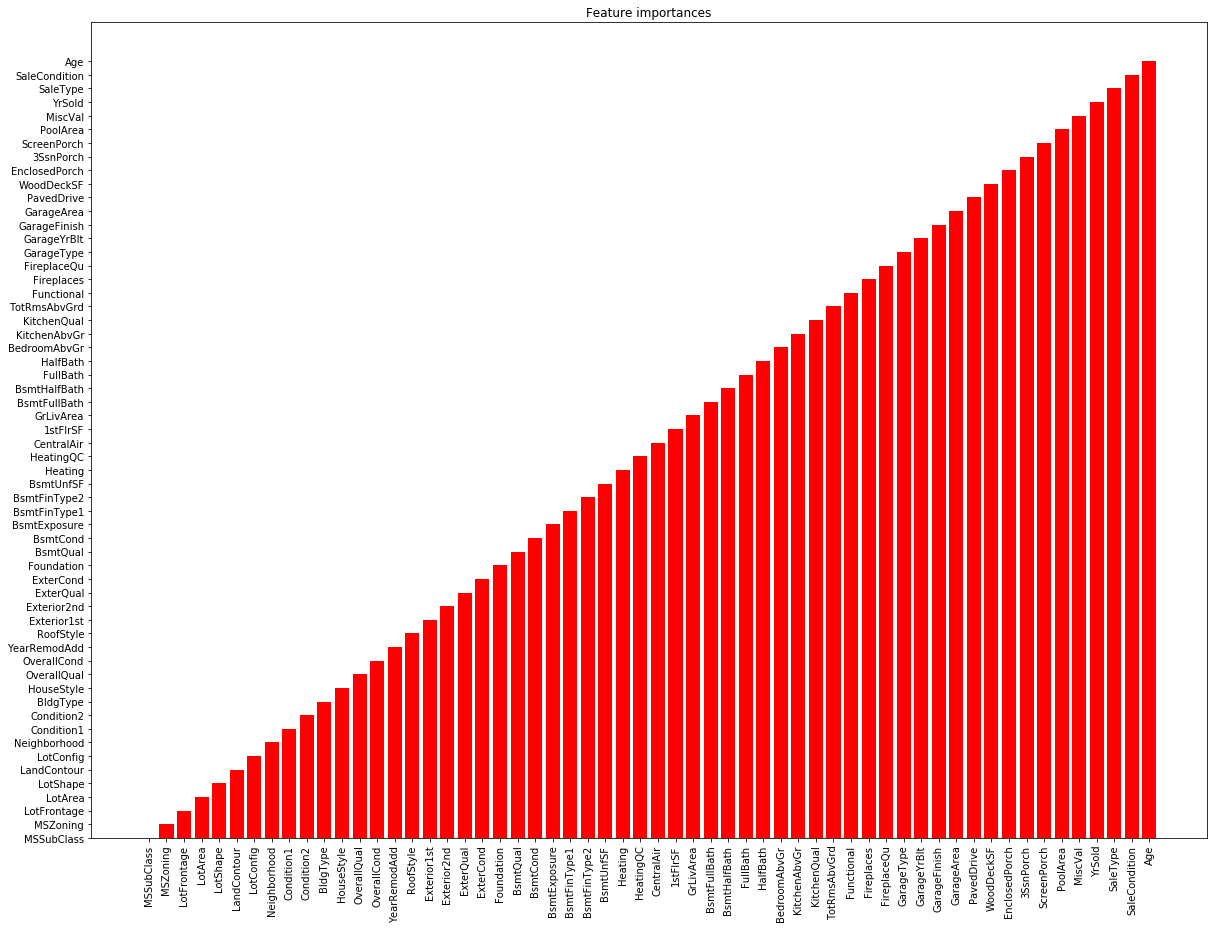

In [66]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,15))
plt.title("Feature importances")
plt.bar(range(len(final_var_list)), final_var_list,color="r", align="center");
plt.xticks(range(len(final_var_list)), final_var_list, rotation=90);

In [67]:
#variables with positive coefficients
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(df):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['MSZoning', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SaleType', 'SaleCondition']
43


In [68]:
#variables with negative coefficients
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(df):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg)
print(len(final_var_neg))

['MSSubClass', 'LotFrontage', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'PoolArea', 'MiscVal', 'YrSold']
23


### Conclusion

1. Optimum value for lambda in ridge regression is 8
2. Optimum value for lambda in lasso regression is 0.001
3. r2_score in train dataset: r2_score for ridge: 0.92, r2_score for lasso: 0.89
4. r2_score in test dataset: r2_score for ridge: 0.9, r2_score for lasso: 0.9

### Change in model after doubling the value of alpha for Ridge and Lasso
###### For Subjective question1

### Ridge after doubling

In [69]:
# list of alphas to tune
params = {'alpha': [0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [70]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005585  4.872165e-04         0.000997    7.747687e-07       1e-06   
1       0.006582  7.965568e-04         0.001196    3.988266e-04       1e-05   
2       0.005984  1.168008e-07         0.000997    1.168008e-07      0.0001   
3       0.005186  3.987077e-04         0.001196    3.990894e-04       0.001   
4       0.005784  1.162697e-03         0.000997    1.302385e-06        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.113152          -0.087732          -0.111020   
1   {'alpha': 1e-05}          -0.113151          -0.087732          -0.111016   
2  {'alpha': 0.0001}          -0.113149          -0.087732          -0.110984   
3   {'alpha': 0.001}          -0.113120          -0.087749          -0.110662   
4    {'alpha': 0.01}          -0.112882          -0.088690          -0.107918   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.101108  ...        -0.100611        0.010425               28   
1          -0.101105  ...        -0.100609        0.010425               27   
2          -0.101073  ...        -0.100590        0.010422               26   
3          -0.100764  ...        -0.100413        0.010394               25   
4          -0.099211  ...        -0.099427        0.009893               24   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.056131           -0.059967           -0.056006   
1           -0.056132           -0.059967           -0.056006   
2           -0.056132           -0.059967           -0.056006   
3           -0.056141           -0.059978           -0.056011   
4           -0.056220           -0.060333           -0.056292   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.058748           -0.058014         -0.057773         0.001526  
1           -0.058748           -0.058014         -0.057773         0.001526  
2           -0.058749           -0.058019         -0.057775         0.001526  
3           -0.058759           -0.058065         -0.057791         0.001529  
4           -0.059077           -0.058798         -0.058144         0.001626  

[5 rows x 21 columns]

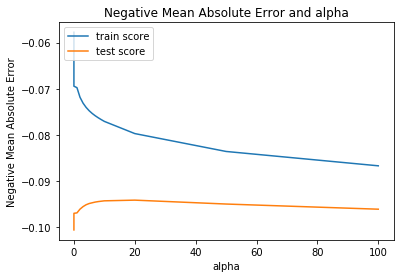

In [71]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [72]:
alpha = 16
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.85375706e-02, -9.84807530e-03,  1.89995447e-02,  8.96399138e-02,
        4.48945934e-02,  1.58359259e-02, -4.90695741e-05, -7.34918492e-03,
        2.71961134e-03,  2.65727015e-03, -4.05053005e-03,  3.75882656e-02,
        3.73971748e-02,  3.73405345e-03,  5.83484188e-02,  3.15325044e-02,
        9.90034290e-04,  1.87546711e-02,  1.67973141e-02,  1.51535092e-02,
       -7.11793745e-03,  2.26505656e-02,  1.06471345e-02,  1.33661236e-02,
        3.24416111e-02,  1.48971917e-02, -2.24836838e-03,  1.26294777e-02,
        8.05811099e-03,  1.68197499e-02, -1.02726718e-02, -5.12616289e-03,
        4.51235268e-04, -7.02193967e-03, -3.25772537e-02,  4.32730568e-02,
        3.17952520e-02,  5.03675676e-02, -1.46214901e-03,  2.38518643e-02,
        2.42286884e-02, -4.18281819e-02, -3.49399445e-03,  4.45904387e-02,
        2.22559748e-02,  3.58676436e-02, -8.00750775e-03,  2.86825918e-02,
       -1.70154814e-02, -9.27130422e-03, -1.87030084e-02,  2.15890541e-02,
       -8.58684382e-03, -

### Lasso after doubling

In [73]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [74]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.134014      0.005534         0.001204        0.000754       1e-06   
1       0.137781      0.013069         0.001397        0.000488       1e-05   
2       0.075491      0.020752         0.001197        0.000399      0.0001   
3       0.022160      0.002374         0.000992        0.000631       0.001   
4       0.009918      0.002916         0.001197        0.000399        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.112832          -0.079368          -0.110393   
1   {'alpha': 1e-05}          -0.111722          -0.079115          -0.108786   
2  {'alpha': 0.0001}          -0.106299          -0.081875          -0.097710   
3   {'alpha': 0.001}          -0.105876          -0.093752          -0.088199   
4    {'alpha': 0.01}          -0.115106          -0.105531          -0.101470   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.100352  ...        -0.098434        0.012668                4   
1          -0.097374  ...        -0.096875        0.012395                3   
2          -0.087201  ...        -0.091089        0.009501                1   
3          -0.090047  ...        -0.094192        0.006181                2   
4          -0.104353  ...        -0.106693        0.004582                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.056212           -0.059998           -0.056043   
1           -0.056588           -0.060328           -0.056278   
2           -0.059771           -0.065709           -0.060402   
3           -0.071407           -0.083272           -0.083776   
4           -0.089211           -0.106113           -0.104158   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.058802           -0.058057         -0.057822         0.001517  
1           -0.059085           -0.058452         -0.058146         0.001527  
2           -0.064045           -0.063845         -0.062754         0.002281  
3           -0.083190           -0.084541         -0.081237         0.004938  
4           -0.103654           -0.103145         -0.101256         0.006106  

[5 rows x 21 columns]

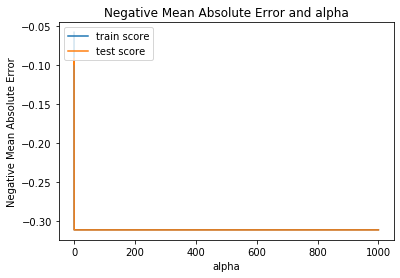

In [75]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [76]:
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Error distribution in test dataset


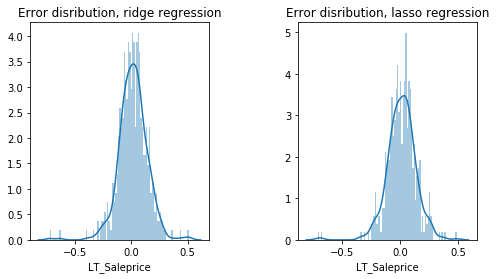

In [77]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [78]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.92
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.9


In [79]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 11.772),
 ('MSSubClass', -0.02),
 ('LotFrontage', -0.008),
 ('LotArea', 0.018),
 ('OverallQual', 0.098),
 ('OverallCond', 0.047),
 ('YearRemodAdd', 0.017),
 ('BsmtUnfSF', 0.007),
 ('1stFlrSF', 0.001),
 ('GrLivArea', 0.103),
 ('BsmtFullBath', 0.034),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.018),
 ('HalfBath', 0.014),
 ('BedroomAbvGr', 0.012),
 ('KitchenAbvGr', -0.004),
 ('TotRmsAbvGrd', 0.023),
 ('Fireplaces', 0.012),
 ('GarageYrBlt', 0.013),
 ('GarageArea', 0.033),
 ('WoodDeckSF', 0.015),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.017),
 ('PoolArea', -0.011),
 ('MiscVal', -0.004),
 ('YrSold', -0.007),
 ('Age', -0.048),
 ('MSZoning_FV', 0.026),
 ('MSZoning_RL', 0.053),
 ('LotShape_IR2', 0.006),
 ('LotShape_IR3', -0.015),
 ('LandContour_HLS', 0.017),
 ('LandContour_Lvl', 0.008),
 ('LotConfig_CulDSac', 0.033),
 ('LotConfig_Inside', -0.012),
 ('Neighborhood_BrkSide', 0.04),
 ('Neighborhood_Crawfor', 0.097),
 ('Neighborhood_Edwards', -0.049),
 ('Nei

In [80]:
#length of the var_coeff
len(var_coeff)

84